In [1]:
############################Initialization############################
RANDOM_SEED = 1 # seed value for random number generator             
import numpy as np
import pandas as pd

import seaborn as sns
import os #manage files
import matplotlib.pyplot as plt  #plots
from matplotlib import rc

import sklearn 
from sklearn.model_selection import train_test_split as tts
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

from scipy import stats as st
import itertools
import tabulate
os.chdir(os.path.expanduser('~/Documents/Northwestern/MSDS422-PML/week2/'))
######################################################################

ModuleNotFoundError: No module named 'tabulate'

In [2]:
############################Read Data and Examine#####################
# initial work with the smaller data set
bank1 = pd.read_csv('bank.csv', sep = ';') 
bank=pd.get_dummies(bank1) #We can convert to dummies right up front. 
# ^this^ is amazing it does all the work for you!
print (bank1.dtypes)
#####################################################################

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object


In [36]:
print(pd.DataFrame.head(bank1)) #Header

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome response  
0  cellular   19   oct        79         1     -1         0  unknown       no  
1  cellular   11   may       220         1    339         4  failure       no  
2  cellular   16   apr       185         1    330         1  failure       no  
3   unknown    3   jun       199         4     -1         0  unknown       no  
4   unknown    5   may       226         1     -1         0  unknown       no  


In [3]:
#######################Some Crosstabs and Plot###########################
a=pd.crosstab(bank.response_yes, 
            bank.housing_yes, 
            rownames=['Response'], colnames=['Housing'])

b=pd.crosstab(bank.response_yes, 
            bank.loan_yes, 
            rownames=['Response'], colnames=['Loan'])

c=pd.crosstab(bank.response_yes, 
            bank.default_yes, 
            rownames=['Response'], colnames=['Default'])

print(a,"\n")
print(b,"\n")
print(c,"\n")

def myor(a):
        myv=round((a.loc[1,1]/a.loc[0,1])/(a.loc[1,0]/a.loc[0,0]),3)
        logmyv=np.log(myv)
        se=np.sqrt(1/(a.loc[1,1]+1/a.loc[0,1]+a.loc[1,0]+a.loc[0,0]))
        lower=round(np.exp(logmyv-1.96*se),3)
        upper=round(np.exp(logmyv+1.96*se),3)
        return [myv, lower, upper]


print('\033[1m',"Odds for Response Yes for Each Variable with 95% CI", '\033[0m')
print("If housing=yes, odds for response=yes:", myor(a))
print("If loan=yes, odds for response=yes:", myor(b))
print("If default=yes, odds for response=yes", myor(c))
#########################################################################

Housing      0     1
Response            
0         1661  2339
1          301   220 

Loan         0    1
Response           
0         3352  648
1          478   43 

Default      0   1
Response          
0         3933  67
1          512   9 

 Odds for Response Yes for Each Variable with 95% CI 
If housing=yes, odds for response=yes: [0.519, 0.498, 0.541]
If loan=yes, odds for response=yes: [0.465, 0.451, 0.48]
If default=yes, odds for response=yes [1.032, 1.002, 1.063]


In [4]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
bank.describe(include="all")

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,response_no,response_yes
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579,0.105729,0.209246,0.037160,0.024773,0.214333,0.050874,0.040478,0.092236,0.018580,0.169874,0.028312,0.008405,0.116788,0.618668,0.264543,0.149967,0.510064,0.298607,0.041363,0.983190,0.016810,0.433975,0.566025,0.847158,0.152842,0.640566,0.066578,0.292856,0.064809,0.140013,0.004424,0.049104,0.032736,0.156160,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,0.819509,0.884760,0.115240
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562,0.307524,0.406815,0.189174,0.155451,0.410404,0.219764,0.197099,0.289391,0.135051,0.375564,0.165882,0.091304,0.321203,0.485767,0.441138,0.357078,0.499954,0.457697,0.199149,0.128575,0.128575,0.495676,0.495676,0.359875,0.359875,0.479888,0.249318,0.455123,0.246215,0.347039,0.066372,0.216109,0.177965,0.363047,0.321994,0.103553,0.462225,0.280458,0.131856,0.106640,0.310898,0.204169,0.166510,0.384638,0.319347,0.319347
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00

(array([4.111e+03, 3.400e+02, 4.700e+01, 1.700e+01, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3313. ,  4137.1, 11587.2, 19037.3, 26487.4, 33937.5, 41387.6,
        48837.7, 56287.8, 63737.9, 71188. ]),
 <a list of 10 Patch objects>)

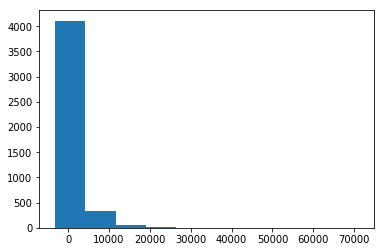

In [6]:
plt.hist(bank1.balance)

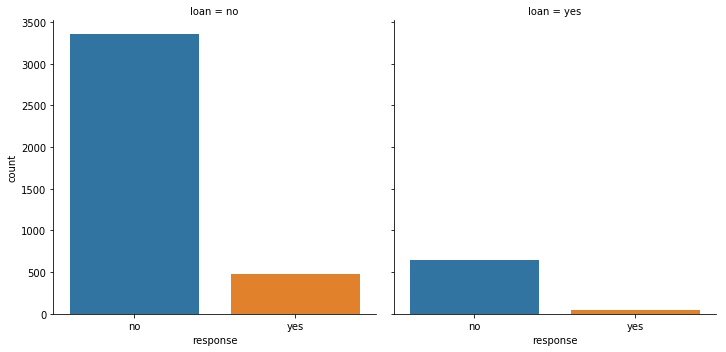

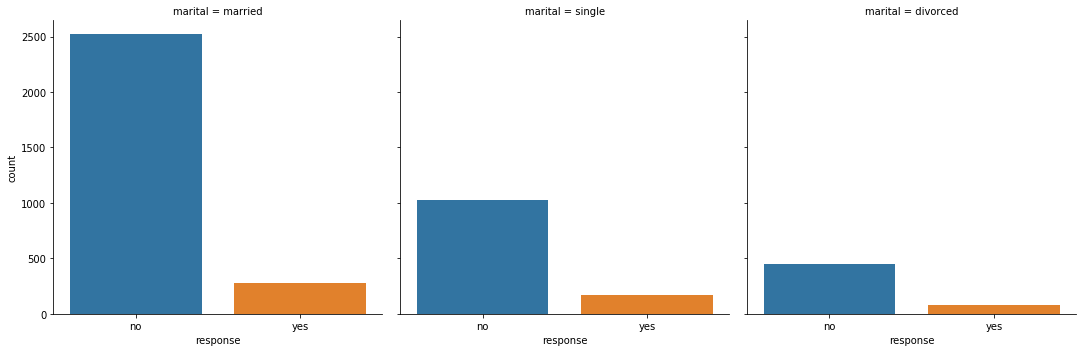

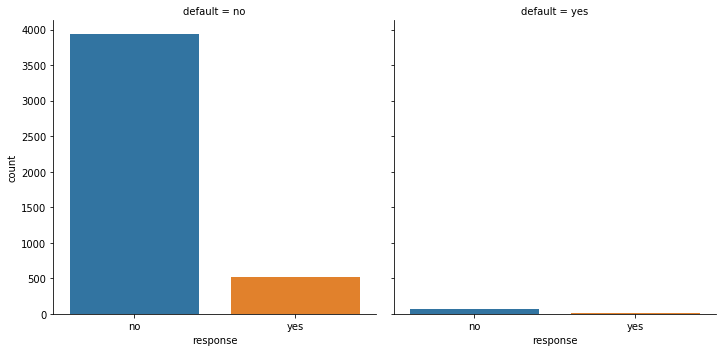

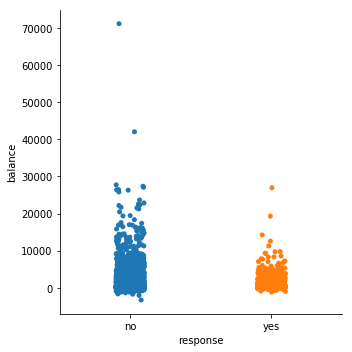

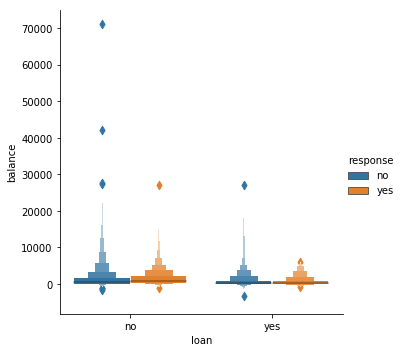

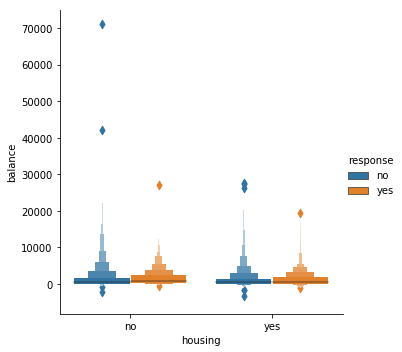

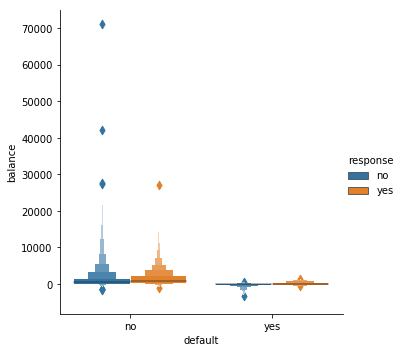

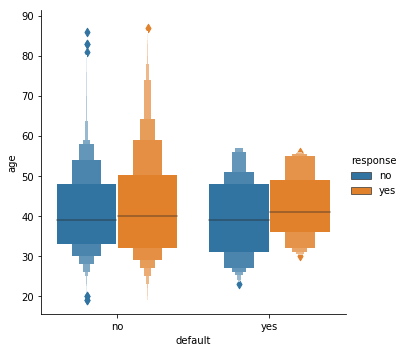

In [7]:
################Plot the Data#########################################
fig1=sns.catplot(x="response", col="loan", data=bank1, kind="count")
fig2=sns.catplot(x="response", col="marital", data=bank1, kind="count")
fig3=sns.catplot(x="response", col="default", data=bank1, kind="count")
fig4=sns.catplot(x="response", y="balance", data=bank1)
fig5=sns.catplot(x="loan", y="balance", hue="response", kind="boxen", data=bank1)
fig6=sns.catplot(x="housing", y="balance", hue="response", kind="boxen", data=bank1)
fig7=sns.catplot(x="default", y="balance", hue="response", kind="boxen", data=bank1)
fig8=sns.catplot(x="default", y="age", hue="response", kind="boxen", data=bank1)
######################################################################

### Here I used the corr plot from week 1 to get a different view of the data.

<Figure size 432x288 with 0 Axes>

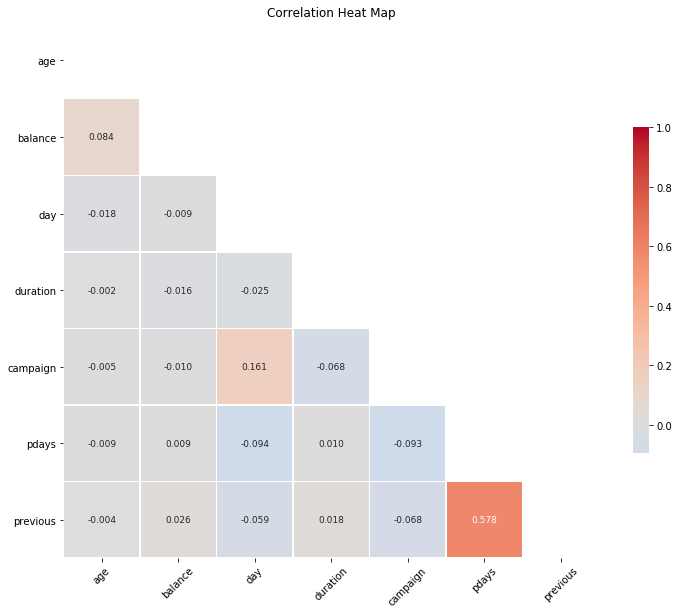

In [5]:
def corr_chart(df_corr):
    
    #This is simple.  We are using the .corr() to build a correlation matrix
    corr=df_corr.corr() 
    
    #Ok.  This is trickier.  Using numpy's zeros_like function, we return an array of zeros of the same shape and type.
    #The dtype option forces the data to be boolean.
    #the zeros are stored in "top.""
    top = np.zeros_like(corr, dtype=np.bool)
    
    #This numpy function returns the indices from the upper triangle of an array and sets them to TRUE for use as a mask. 
    top[np.triu_indices_from(top)] = True
    
    #Establish a Matlib (plt) figure container
    fig=plt.figure()
    
    #Build figure parameters
    fig, ax = plt.subplots(figsize=(12,12))
    
    #Define the seaborn heatmap function.  We will plot the passed correlation.  
    #We will use the mask "top" we just built.
    #We will use a color map of coolwarm.     
    sns.heatmap(corr, mask=top, cmap='coolwarm',  
        center = 0, square=True,  #Center location and shape = square.
        linewidths=.5, cbar_kws={'shrink':.5}, #linewidth and colorbar parameters set.
        annot = True, annot_kws={'size': 9}, fmt = '.3f') #Annotation and annotation parameters, 3 decimals.       
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis) 
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   #title
    
corr_chart(df_corr = bank1) 

### I ran some different plots to check out some different variables.

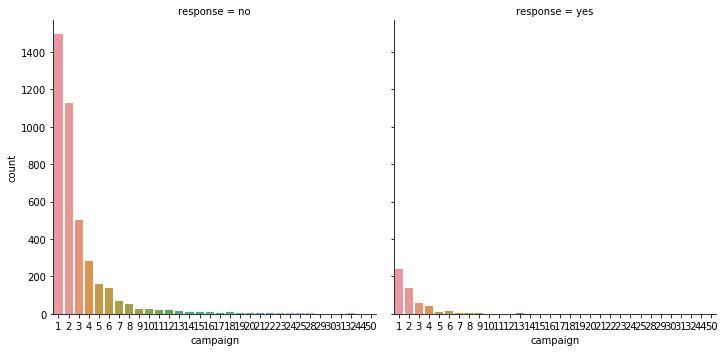

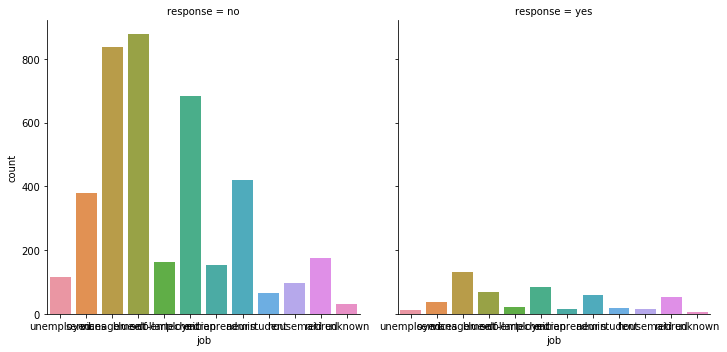

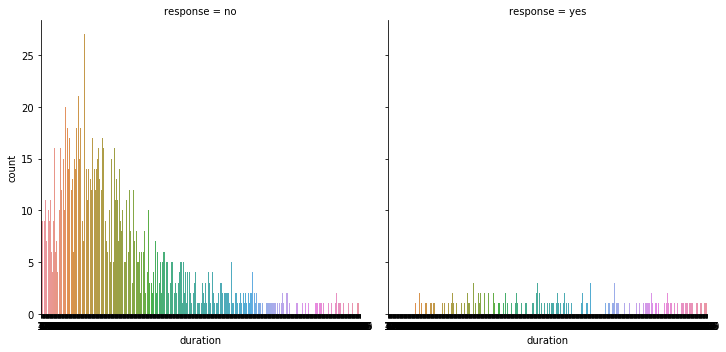

In [6]:
################Plot the Data#########################################
# age          job  marital  education default  balance housing loan
 #   contact  day month  duration  campaign  pdays  previous poutcome

fig1=sns.catplot(x="campaign", col="response", data=bank1, kind="count")
fig1=sns.catplot(x="job", col="response", data=bank1, kind="count")
fig1=sns.catplot(x="duration", col="response", data=bank1, kind="count")


In [7]:
X,y=np.array(bank[['loan_yes', 'default_yes', 'housing_yes']]),np.array(bank['response_yes'])
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.3, random_state=42)
print("% defaults:", round(100*sum(y) / len(y),2))

% defaults: 11.52


### Since the jump-start predictor variables didn't give a very good model I did a little experimenting and selected a different set that gives a better model.

In [110]:
#X,y=np.array(bank[['duration', 'balance', 'pdays','previous']]),np.array(bank['response_yes'])
X,y=np.array(bank[['duration','campaign', 'pdays','balance']]),np.array(bank['response_yes'])
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.3, random_state=42)
print("% defaults:", round(100*sum(y) / len(y),2))

% defaults: 11.52


In [12]:
minority, majority=X_train[y_train==1], X_train[y_train==0] #bifurcate
oversample=len(majority)

#########Resample with Replacement###################################################
minority= resample(minority, replace=True, n_samples=oversample, random_state=123) 
#####################################################################################

#########Rebuild the training set with the upsampled data###########################
X_train1=np.concatenate((minority, majority))
a,b=np.repeat(1,oversample),np.repeat(0,len(majority)) 
y_train1=np.append(a, b)
print(sum(y_train1)/len(y_train1))
#####################################################################################

0.5


In [13]:
###Import Necessary Libraries
from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import confusion_matrix as cm
from sklearn.naive_bayes import BernoulliNB as bern
from sklearn.linear_model import LogisticRegression as lr 
from sklearn.model_selection import cross_val_score as cvs
from sklearn import metrics
nfolds=10

clf = lr(solver="lbfgs", multi_class="ovr") ##leave one out CV=8000
mycvs=cvs(clf,X_train1,y_train1,cv=nfolds)
print("Accuracy of LR: \n", mycvs)

Accuracy of LR: 
 [0.57678571 0.58035714 0.59285714 0.58571429 0.61964286 0.60573477
 0.58960573 0.59677419 0.62903226 0.58781362]



 Accuracy of NB: 
 [0.57678571 0.58035714 0.59285714 0.58571429 0.61964286 0.60573477
 0.58960573 0.59677419 0.62903226 0.58781362]


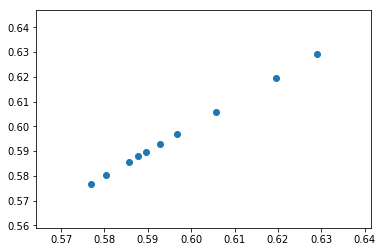

In [14]:
clf1=bern() #(binarize = 0.01) this didn't help
mycvs1=cvs(clf1, X_train1, y_train1, cv=nfolds)
print("\n Accuracy of NB: \n", mycvs1)  #NOTE:  These are going to be close.  Why?


from matplotlib.pyplot import scatter
scatter(mycvs, mycvs1)

#The two models produce the same results as the training set size 
#approaches ∞ IF the Naive Bayes assumption holds that the xi’s are 
#conditionally independent of one another given y. 

In [15]:
clf.fit(X_train1,y_train1)
mypred=clf.predict_proba(X_train1)
mypred = [p[1] for p in mypred]
mypredclass=clf.predict(X_train1)

clf1.fit(X_train1,y_train1)
mypred1=clf1.predict_proba(X_train1)
mypred1=[p[1] for p in mypred1]
mypredclass1=clf1.predict(X_train1)

def metrics(y,mypred):
    print("Area Under the Curve:", roc(y,mypred))
    myconfusion=cm(y,mypredclass)
    PPV=(myconfusion[1,1]/(myconfusion[1,0]+myconfusion[1,1]))
    NPV=(myconfusion[0,0]/(myconfusion[0,0]+myconfusion[0,1]))
    print("\n Confusion Matrix: \n",myconfusion)
    print("\n PPV, Correctly Classifies Response Yes: \n", PPV)
    print("\n NPV, Correctly Classifies Response No: \n", NPV)
    
metrics(y_train1,mypred)
metrics(y_train1,mypred1)

Area Under the Curve: 0.5985032689987552

 Confusion Matrix: 
 [[1801  994]
 [1253 1542]]

 PPV, Correctly Classifies Response Yes: 
 0.5516994633273703

 NPV, Correctly Classifies Response No: 
 0.6443649373881932
Area Under the Curve: 0.5985032689987552

 Confusion Matrix: 
 [[1801  994]
 [1253 1542]]

 PPV, Correctly Classifies Response Yes: 
 0.5516994633273703

 NPV, Correctly Classifies Response No: 
 0.6443649373881932


In [16]:
mypred=clf.predict_proba(X_test)
mypred = [p[1] for p in mypred]
mypredclass=clf.predict(X_test)

mypred1=clf1.predict_proba(X_test)
mypred1=[p[1] for p in mypred1]
mypredclass1=clf1.predict(X_test)

metrics(y_test,mypred)
metrics(y_test,mypred1)

Area Under the Curve: 0.5959407075780739

 Confusion Matrix: 
 [[793 412]
 [ 72  80]]

 PPV, Correctly Classifies Response Yes: 
 0.5263157894736842

 NPV, Correctly Classifies Response No: 
 0.6580912863070539
Area Under the Curve: 0.5959407075780739

 Confusion Matrix: 
 [[793 412]
 [ 72  80]]

 PPV, Correctly Classifies Response Yes: 
 0.5263157894736842

 NPV, Correctly Classifies Response No: 
 0.6580912863070539


In [18]:
mypred

[0.5297641709575525,
 0.5952118942691673,
 0.5952118942691673,
 0.43310425626883475,
 0.5952118942691673,
 0.5952118942691673,
 0.43310425626883475,
 0.5952118942691673,
 0.5952118942691673,
 0.5952118942691673,
 0.5952118942691673,
 0.43310425626883475,
 0.43310425626883475,
 0.5952118942691673,
 0.43310425626883475,
 0.43310425626883475,
 0.5952118942691673,
 0.5952118942691673,
 0.43310425626883475,
 0.43310425626883475,
 0.43310425626883475,
 0.31613888220826997,
 0.5952118942691673,
 0.5952118942691673,
 0.43310425626883475,
 0.43310425626883475,
 0.43310425626883475,
 0.5952118942691673,
 0.43310425626883475,
 0.43310425626883475,
 0.5952118942691673,
 0.43310425626883475,
 0.31613888220826997,
 0.43310425626883475,
 0.4708275288587837,
 0.4708275288587837,
 0.5952118942691673,
 0.43310425626883475,
 0.43310425626883475,
 0.5952118942691673,
 0.43310425626883475,
 0.43310425626883475,
 0.5952118942691673,
 0.43310425626883475,
 0.43310425626883475,
 0.43310425626883475,
 0.316138

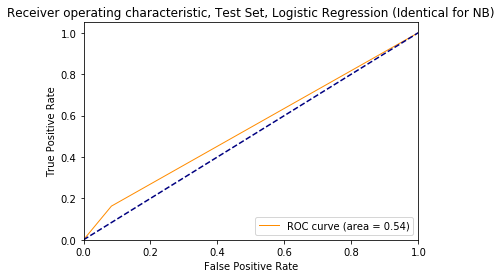

In [17]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(mypredclass, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic, Test Set, Logistic Regression (Identical for NB)')
plt.legend(loc="lower right")
plt.show()


we can see for the graph above that the model is bairly better than the random model (dotted line).  ideally the orange line would be hugging the top with a ROC close to 1.